In [ ]:
# Cleaning the Dataframe - Exemples de cleaning avec des fonctions a utiliser
    ## Missing values handling - Examples
    ## Null, NaN, NA
    ## UDF - from Null or NAN or NA to 0 if it's a number
    ### Outliers, 
# Data Analysis - Utilisation de plusieurs GroupBy pour generer des insights
    ## Largest new_cases in a month / location
    ## Largest new_deaths in a month / location
    ## Largest Ratio in new cases and deaths (population_density)
    ## Largest number of cases within the whole period
    ## Largest number of deaths within the whole period

# Adding columns - detecting causality - if there any
    ## What causes new cases per location (people from a location are smokers)
    ## icu_patients analysis
    ## tests analysis
    ## vaccination - comparing vacc rate in a period / location
    ## age analysis

In [54]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [55]:
data.head(22)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [56]:
data.tail(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
115249,ZWE,Africa,Zimbabwe,2021-09-07,125796.0,125.0,146.143,4503.0,10.0,12.0,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [57]:
data.shape

(115250, 62)

In [58]:
data[1:]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115245,ZWE,Africa,Zimbabwe,2021-09-03,125331.0,213.0,156.429,4457.0,8.0,11.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
115246,ZWE,Africa,Zimbabwe,2021-09-04,125425.0,94.0,151.143,4466.0,9.0,10.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
115247,ZWE,Africa,Zimbabwe,2021-09-05,125550.0,125.0,159.000,4482.0,16.0,11.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
115248,ZWE,Africa,Zimbabwe,2021-09-06,125671.0,121.0,155.714,4493.0,11.0,11.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [59]:
list(data.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [60]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.096610e+05,109658.000000,108643.000000,9.905600e+04,99211.000000,108643.000000,109082.000000,109079.000000,108069.000000,98490.000000,...,68870.000000,102236.000000,105290.000000,79854.000000,78692.000000,51356.000000,92991.000000,109324.000000,102330.000000,4002.000000
mean,1.327031e+06,6397.348730,6408.844846,3.425075e+04,146.056546,132.641245,16345.837360,80.727112,80.711305,347.625456,...,13.459296,259.063906,7.996841,10.592077,32.729542,50.762518,3.024691,73.258067,0.726724,18.070182
std,8.929303e+06,39235.038797,38781.402106,2.043031e+05,796.845272,744.174888,28455.203342,188.121175,160.417929,600.734843,...,19.976042,119.255294,4.252348,10.499909,13.498437,31.754521,2.454261,7.544650,0.150261,35.098050
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.788000e+03,2.000000,8.714000,6.300000e+01,0.000000,0.000000,315.991500,0.265000,1.466000,9.549000,...,0.600000,168.711000,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,0.652500
50%,1.807000e+04,87.000000,108.000000,5.450000e+02,2.000000,1.571000,2418.694500,10.102000,13.619000,62.544000,...,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,7.650000
75%,1.935030e+05,894.000000,943.571000,4.730000e+03,18.000000,15.286000,18785.299250,78.167000,86.762000,411.226750,...,21.200000,329.942000,10.080000,19.300000,41.100000,82.502000,3.861000,78.740000,0.848000,23.602500
max,2.219329e+08,905932.000000,826340.429000,4.586161e+06,17976.000000,14722.714000,205044.990000,8620.690000,3385.473000,5952.383000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,410.900000


In [72]:
data[data["new_cases"].isnull()].shape

(5592, 62)

In [66]:
data[(data["date"] > '2020-03-25') & (data["date"] < '2020-04-25') & (data["location"] == 'Afghanistan')]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
31,AFG,Asia,Afghanistan,2020-03-26,80.0,4.0,7.857,3.0,1.0,0.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
32,AFG,Asia,Afghanistan,2020-03-27,91.0,11.0,8.857,3.0,0.0,0.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
33,AFG,Asia,Afghanistan,2020-03-28,107.0,16.0,11.000,4.0,1.0,0.571,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
34,AFG,Asia,Afghanistan,2020-03-29,118.0,11.0,12.000,4.0,0.0,0.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
35,AFG,Asia,Afghanistan,2020-03-30,146.0,28.0,15.000,4.0,0.0,0.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
36,AFG,Asia,Afghanistan,2020-03-31,175.0,29.0,18.857,4.0,0.0,0.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
37,AFG,Asia,Afghanistan,2020-04-01,197.0,22.0,17.286,4.0,0.0,0.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
38,AFG,Asia,Afghanistan,2020-04-02,240.0,43.0,22.857,4.0,0.0,0.143,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
39,AFG,Asia,Afghanistan,2020-04-03,275.0,35.0,26.286,8.0,4.0,0.714,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
40,AFG,Asia,Afghanistan,2020-04-04,300.0,25.0,27.571,10.0,2.0,0.857,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [64]:
data["date"][1:2].tolist()[0]

'2020-02-25'

In [92]:
sum(data['new_cases'][(data["continent"] == 'Asia') & (data["new_cases"].notnull())].tolist())

70899908.0

In [76]:
sum(data['new_cases'][(data["continent"] == 'Asia') & (data["new_cases"].notnull())].tolist())

70899908.0

In [95]:
data[['continent', 'new_cases', 'new_deaths']].groupby(['continent']).sum()

,new_cases,new_deaths
continent,,
Africa,7951066.0,200420.0
Asia,70899908.0,1065461.0
Europe,56971420.0,1187864.0
North America,48409729.0,994234.0
Oceania,136348.0,1808.0
South America,37087903.0,1127556.0


In [98]:
min(data['date'].tolist())

'2020-01-01'

In [113]:
max(data['date'].tolist())

'2021-09-07'

In [136]:
Group = data[['iso_code', 'location', 'new_cases']][data['new_cases'] < 0].groupby(['iso_code', 'location']).sum()

<AxesSubplot:xlabel='iso_code'>

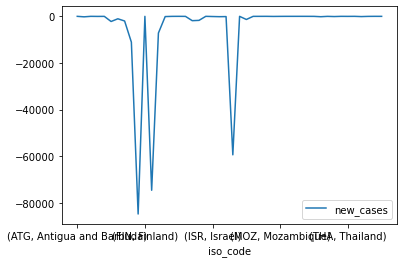

In [126]:
Group.plot(xlabel='iso_code')

<AxesSubplot:xlabel='iso_code', ylabel='new_cases'>

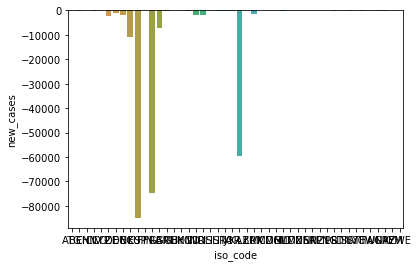

In [134]:
import seaborn as sns
Group.reset_index()
sns.barplot(x='iso_code', y='new_cases', data=Group)

<AxesSubplot:ylabel='count'>

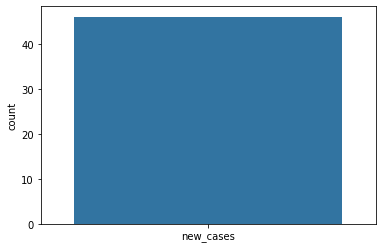

In [138]:
import seaborn as sns
Group.reset_index()
sns.countplot(x='iso_code', y='new_cases', data=Group)

In [111]:
data[(data['location'] == 'France') & (data['date'] > '2020-04-24') & (data['date'] < '2020-05-24')]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
37395,FRA,Europe,France,2020-04-25,161647.0,1678.0,1540.857,22587.0,369.0,468.857,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
37396,FRA,Europe,France,2020-04-26,162280.0,633.0,1475.000,22830.0,243.0,448.000,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,17.44
37397,FRA,Europe,France,2020-04-27,165966.0,3686.0,1652.000,23267.0,437.0,432.286,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
37398,FRA,Europe,France,2020-04-28,169098.0,3132.0,1718.571,23634.0,367.0,409.286,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
37399,FRA,Europe,France,2020-04-29,167643.0,-1455.0,1253.714,24060.0,426.0,392.429,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
37400,FRA,Europe,France,2020-04-30,168861.0,1218.0,1671.857,24349.0,289.0,360.000,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
37401,FRA,Europe,France,2020-05-01,169387.0,526.0,1345.429,24566.0,217.0,335.429,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
37402,FRA,Europe,France,2020-05-02,170179.0,792.0,1218.857,24763.0,197.0,310.857,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
37403,FRA,Europe,France,2020-05-03,170540.0,361.0,1180.000,24898.0,135.0,295.429,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,4.48
37404,FRA,Europe,France,2020-05-04,171102.0,562.0,733.714,25204.0,306.0,276.714,...,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
